compilation time: 0.027001619338989258
Train on 778 samples, validate on 16 samples
Epoch 1/1
778/778 [==============================] - 6s 7ms/step - loss: 0.0016 - val_loss: 3.1311e-04
num is :  8.8


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


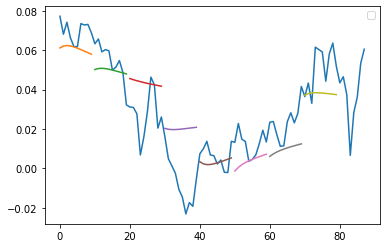

88/88 [==============================] - 0s 4ms/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 300)         362400    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 300)         0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 522,901
Trainable params: 522,901
Non-trainable param

'\nmodel.save("stock_pridict.h5")\n'

In [4]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
from keras.models import load_model

X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

#print(X_train, y_train, X_test, y_test)


#init model
model = Sequential();

#히든 레이어를 50개로 설정.
model.add( LSTM( input_dim = 1, output_dim = 300, return_sequences = True ) )
#과대적합을 피하기 위한 20% 버리기
model.add( Dropout( 0.2 ) )

model.add( LSTM( 100, return_sequences = False ) )
model.add( Dropout( 0.2 ) )

model.add( Dense( output_dim = 1 ) )
model.add( Activation( 'linear' ) )

'''
model = load_model("stock_pridict.h5")
'''

start = time.time()
model.compile( loss = 'mse', optimizer = 'rmsprop' )
print( 'compilation time:',time.time()-start )


#train model. until target status.
model.fit( X_train, y_train, batch_size = 64, epochs = 1, validation_split = 0.02 )


predictions = lstm.predict_sequences_multiple(model, X_test, 50, 10)
lstm.plot_results_multiple(predictions, y_test, 10)

model.evaluate( X_test, y_test, batch_size = 64 )
model.summary()

'''
model.save("stock_pridict.h5")
'''